In [24]:
import SimpleITK as sitk
import cv2
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
fixed = sitk.ReadImage("BrainT1Slice.png", sitk.sitkFloat32)
moving = sitk.ReadImage("BrainT1SliceBorder20.png",sitk.sitkFloat32)
#sitk.Show(img1, title="cthead1")

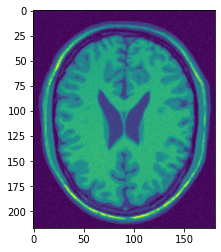

In [17]:
def plot(img):
    nda = sitk.GetArrayFromImage(img)
    plt.imshow(nda)
plot(fixed)

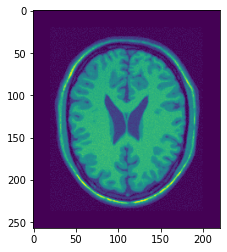

In [18]:
plot(moving)

In [21]:
def command_iteration(method):
    if (method.GetOptimizerIteration() == 0):
        print("Estimated Scales: ", method.GetOptimizerScales())
    print(f"{method.GetOptimizerIteration():3} = {method.GetMetricValue():7.5f} : {method.GetOptimizerPosition()}")


In [26]:
pixelType = sitk.sitkFloat32

R = sitk.ImageRegistrationMethod()

R.SetMetricAsCorrelation()

R.SetOptimizerAsRegularStepGradientDescent(learningRate=2.0,
                                           minStep=1e-4,
                                           numberOfIterations=500,
                                           gradientMagnitudeTolerance=1e-8)
R.SetOptimizerScalesFromIndexShift()

tx = sitk.CenteredTransformInitializer(fixed, moving,
                                       sitk.Similarity2DTransform())
R.SetInitialTransform(tx)

R.SetInterpolator(sitk.sitkLinear)

R.AddCommand(sitk.sitkIterationEvent, lambda: command_iteration(R))

outTx = R.Execute(fixed, moving)

print("-------")
print(outTx)
print(f"Optimizer stop condition: {R.GetOptimizerStopConditionDescription()}")
print(f" Iteration: {R.GetOptimizerIteration()}")
print(f" Metric value: {R.GetMetricValue()}")

Estimated Scales:  (20623.34381056908, 20623.1719499435, 1.0000000000010232, 0.999999999998181)
  0 = -0.99650 : (1.0021214985078377, 0.0005193501107209894, 21.888271368246492, 20.624139064104238)
  1 = -0.84992 : (1.0017108362348297, 0.00040570495329939304, 20.92221822983937, 20.365795973979836)
  2 = -0.94704 : (1.0008097470370803, 0.00028555058866019874, 19.972342987003525, 20.053168085510606)
  3 = -0.99652 : (0.9972628331331682, 0.00018375262218357097, 20.2097141516742, 19.613119975388745)
  4 = -0.98375 : (0.998283875582685, 0.000167631857173788, 20.079963740745022, 19.826810845750927)
  5 = -0.99397 : (0.9996287579015534, 0.00014749145605074882, 19.968852991592573, 20.050758590344827)
  6 = -0.99673 : (1.0000568704340822, 0.0001268380476328366, 20.054398455565394, 19.959616997826533)
  7 = -0.99678 : (1.000073458234207, 0.00011896555535234789, 20.000435375136508, 19.991148499749123)
  8 = -0.99654 : (0.9999333715633995, 8.244241164603235e-05, 19.999964219767115, 20.0536465561541

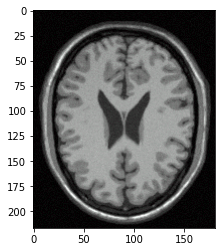

In [28]:
if ("SITK_NOSHOW" not in os.environ):
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(fixed)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetDefaultPixelValue(1)
    resampler.SetTransform(outTx)

    out = resampler.Execute(moving)

    simg1 = sitk.Cast(sitk.RescaleIntensity(fixed), sitk.sitkUInt8)
    simg2 = sitk.Cast(sitk.RescaleIntensity(out), sitk.sitkUInt8)
    cimg = sitk.Compose(simg1, simg2, simg1 // 2. + simg2 // 2.)
    #sitk.Show(cimg, "ImageRegistration2 Composition")
    plot(cimg)

In [ ]:
#sitk.WriteTransform(outTx, sys.argv[3])